In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Train.csv")

In [ ]:
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

(33750, 15)

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64


In [ ]:
df.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
categorical_columns = ['is_holiday', 'weather_type', 'weather_description']
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in is_holiday: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
Unique values in weather_type: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
Unique values in weather_description: ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

df.set_index('date_time', inplace=True)


In [ ]:
df.head(2)

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516


In [ ]:
df_is_holiday = pd.get_dummies(df['is_holiday'])

In [ ]:
df_is_holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Christmas Day              33750 non-null  bool 
 1   Columbus Day               33750 non-null  bool 
 2   Independence Day           33750 non-null  bool 
 3   Labor Day                  33750 non-null  bool 
 4   Martin Luther King Jr Day  33750 non-null  bool 
 5   Memorial Day               33750 non-null  bool 
 6   New Years Day              33750 non-null  bool 
 7   State Fair                 33750 non-null  bool 
 8   Thanksgiving Day           33750 non-null  bool 
 9   Veterans Day               33750 non-null  bool 
 10  Washingtons Birthday       33750 non-null  bool 
dtypes: bool(11)
memory usage: 626.2 KB


In [ ]:
df_weather_type = pd.get_dummies(df['weather_type'])

In [ ]:
df_weather_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Clear         33750 non-null  bool 
 1   Clouds        33750 non-null  bool 
 2   Drizzle       33750 non-null  bool 
 3   Fog           33750 non-null  bool 
 4   Haze          33750 non-null  bool 
 5   Mist          33750 non-null  bool 
 6   Rain          33750 non-null  bool 
 7   Smoke         33750 non-null  bool 
 8   Snow          33750 non-null  bool 
 9   Squall        33750 non-null  bool 
 10  Thunderstorm  33750 non-null  bool 
dtypes: bool(11)
memory usage: 626.2 KB


In [ ]:
df_weather_description = pd.get_dummies(df['weather_description'])

In [ ]:
df_weather_description.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   SQUALLS                              33750 non-null  bool 
 1   Sky is Clear                         33750 non-null  bool 
 2   broken clouds                        33750 non-null  bool 
 3   drizzle                              33750 non-null  bool 
 4   few clouds                           33750 non-null  bool 
 5   fog                                  33750 non-null  bool 
 6   freezing rain                        33750 non-null  bool 
 7   haze                                 33750 non-null  bool 
 8   heavy intensity drizzle              33750 non-null  bool 
 9   heavy intensity rain                 33750 non-null  bool 
 10  heavy snow                           33750 non-null  bool 
 11  light intensity dri

In [ ]:
df_processed = pd.concat([df, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           43 non-null     object 
 1   air_pollution_index                  33750 non-null  int64  
 2   humidity                             33750 non-null  int64  
 3   wind_speed                           33750 non-null  int64  
 4   wind_direction                       33750 non-null  int64  
 5   visibility_in_miles                  33750 non-null  int64  
 6   dew_point                            33750 non-null  int64  
 7   temperature                          33750 non-null  float64
 8   rain_p_h                             33750 non-null  float64
 9   snow_p_h                             33750 non-null  float64
 10  clouds_all                           33750 non-null  int64 

In [ ]:
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [ ]:
df_processed.head(2)

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,sleet,smoke,snow,thunderstorm,thunderstorm with drizzle,thunderstorm with heavy rain,thunderstorm with light drizzle,thunderstorm with light rain,thunderstorm with rain,very heavy rain
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,...,False,False,False,False,False,False,False,False,False,False
2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,...,False,False,False,False,False,False,False,False,False,False


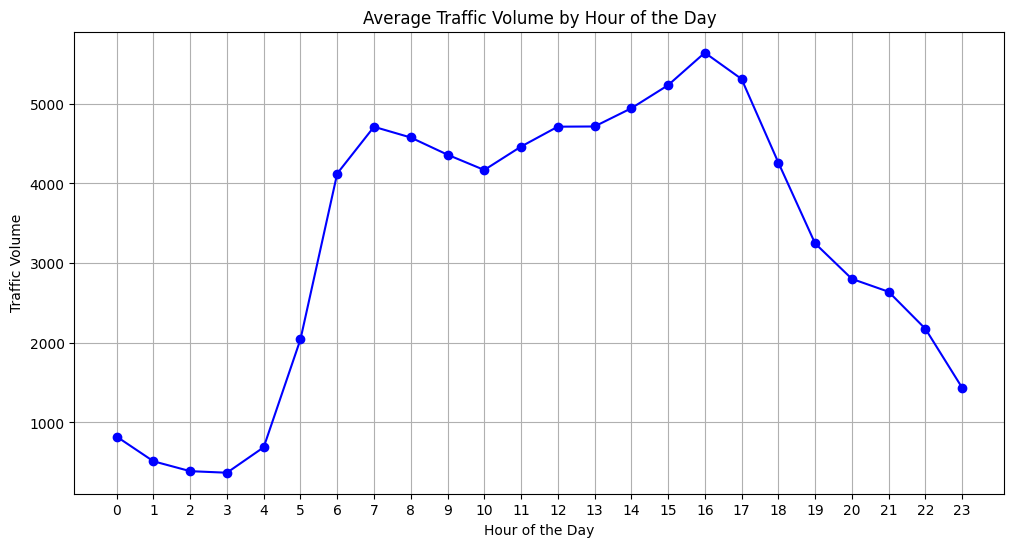

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['hour'] = df.index.hour
hourly_traffic = df.groupby('hour')['traffic_volume'].mean()

plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linestyle='-', color='b')
plt.title("Average Traffic Volume by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Volume")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


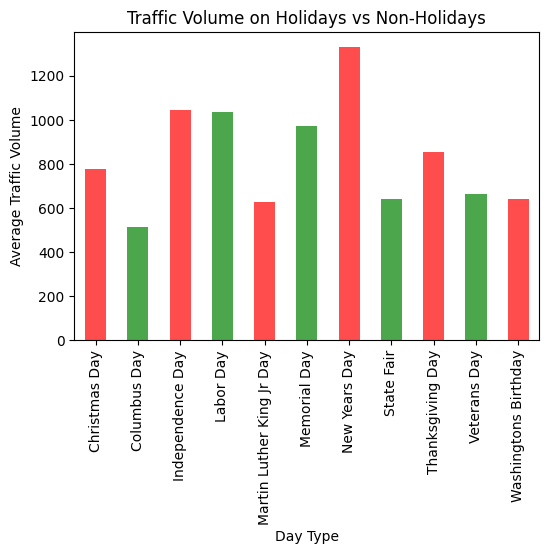

In [ ]:
plt.figure(figsize=(6, 4))
holiday_traffic = df.groupby('is_holiday')['traffic_volume'].mean()

holiday_traffic.plot(kind='bar', color=['r', 'g'], alpha=0.7)
plt.title("Traffic Volume on Holidays vs Non-Holidays")
plt.xlabel("Day Type")
plt.ylabel("Average Traffic Volume")
plt.show()

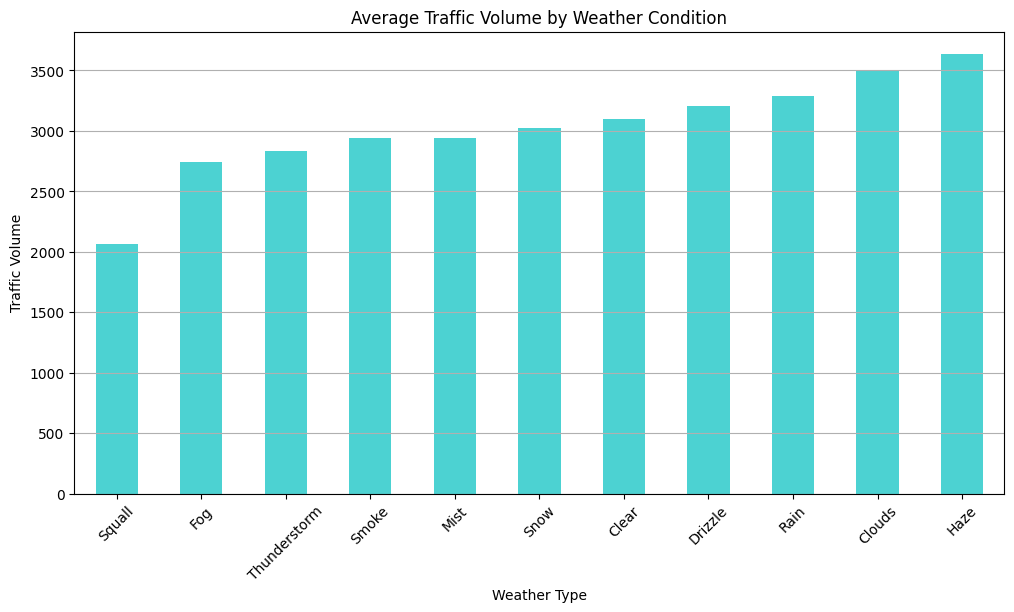

In [ ]:
plt.figure(figsize=(12, 6))
weather_traffic = df.groupby('weather_type')['traffic_volume'].mean().sort_values()

weather_traffic.plot(kind='bar', color='c', alpha=0.7)
plt.title("Average Traffic Volume by Weather Condition")
plt.xlabel("Weather Type")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
df_processed['day_of_week'] = df.index.dayofweek

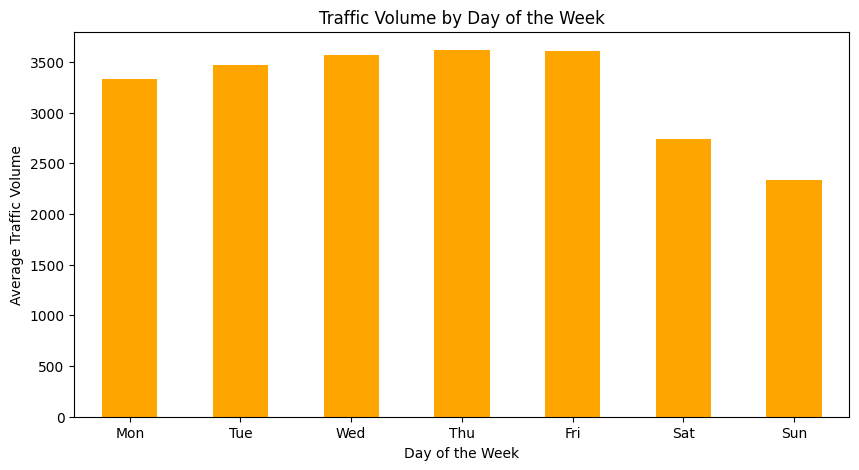

In [ ]:
plt.figure(figsize=(10, 5))
df_processed.groupby('day_of_week')['traffic_volume'].mean().plot(kind='bar', color='orange')
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic Volume")
plt.title("Traffic Volume by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.show()


In [ ]:
df_target = df_processed['traffic_volume']

In [ ]:
df_target

,traffic_volume
date_time,
2012-10-02 09:00:00,5545
2012-10-02 10:00:00,4516
2012-10-02 11:00:00,4767
2012-10-02 12:00:00,5026
2012-10-02 13:00:00,4918
...,...
2017-05-17 21:00:00,2348
2017-05-17 22:00:00,2194
2017-05-17 22:00:00,2194


In [ ]:
df_processed.drop(columns=['traffic_volume'], inplace=True)

In [ ]:
df_processed['traffic_volume'] = df_target

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  Christmas Day                        33750 non-null  bool  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df_processed)
df_processed_scaled = scaler.transform(df_processed)
df_processed_scaled

array([[-0.40415257,  1.05572004, -0.67040489, ..., -0.0261141 ,
        -0.02310017,  1.15738423],
       [ 0.27657226, -0.2497631 , -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.64067732],
       [-0.4996929 , -0.30910324, -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.76671564],
       ...,
       [-0.20112938, -0.07174267, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.52530271],
       [ 0.88564185, -0.30910324, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003],
       [-0.17724429, -0.48712367, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003]])

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1
n_past = 14

In [ ]:
for i in range(n_past, len(df_processed_scaled) - n_future +1):
    trainX.append(df_processed_scaled[i - n_past:i, 0:df_processed.shape[1]])
    trainY.append(df_processed_scaled[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 71).
trainY shape == (33736, 1).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 14, 64)         │        34,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,265 (184.63 KB)

 Trainable params: 47,265 (184.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - loss: 0.4695 - val_loss: 0.1115
Epoch 2/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - loss: 0.1363 - val_loss: 0.0810
Epoch 3/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - loss: 0.1195 - val_loss: 0.0720
Epoch 4/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 0.1103 - val_loss: 0.0733
Epoch 5/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 0.1054 - val_loss: 0.0777


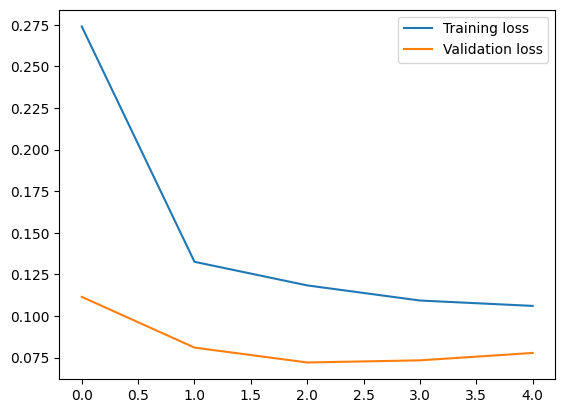

In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
df_ = pd.read_csv("Train.csv")

In [ ]:
train_dates = pd.to_datetime(df_['date_time'])
print(train_dates.tail(30))

33720   2017-05-17 10:00:00
33721   2017-05-17 10:00:00
33722   2017-05-17 11:00:00
33723   2017-05-17 12:00:00
33724   2017-05-17 12:00:00
33725   2017-05-17 13:00:00
33726   2017-05-17 13:00:00
33727   2017-05-17 14:00:00
33728   2017-05-17 15:00:00
33729   2017-05-17 16:00:00
33730   2017-05-17 16:00:00
33731   2017-05-17 17:00:00
33732   2017-05-17 17:00:00
33733   2017-05-17 18:00:00
33734   2017-05-17 18:00:00
33735   2017-05-17 18:00:00
33736   2017-05-17 18:00:00
33737   2017-05-17 19:00:00
33738   2017-05-17 19:00:00
33739   2017-05-17 19:00:00
33740   2017-05-17 20:00:00
33741   2017-05-17 20:00:00
33742   2017-05-17 20:00:00
33743   2017-05-17 21:00:00
33744   2017-05-17 21:00:00
33745   2017-05-17 21:00:00
33746   2017-05-17 22:00:00
33747   2017-05-17 22:00:00
33748   2017-05-17 23:00:00
33749   2017-05-17 23:00:00
Name: date_time, dtype: datetime64[ns]


In [ ]:
n_days_for_prediction=200

In [ ]:
prediction = model.predict(trainX[-n_days_for_prediction:])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [ ]:
true = trainY[-n_days_for_prediction:]

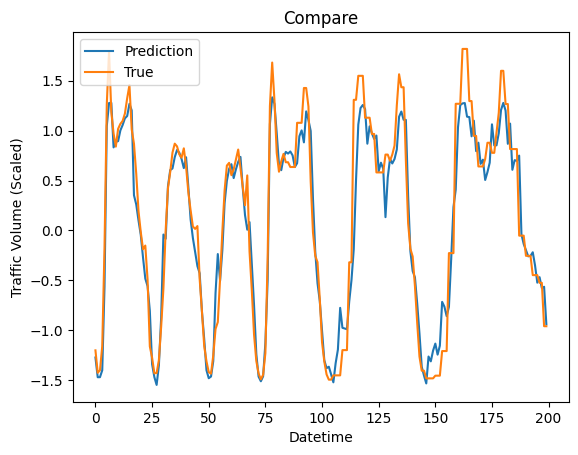

In [ ]:
plt.plot(prediction)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(true, prediction)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

rmse = np.sqrt(mean_squared_error(true, prediction))
print("RMSE:", rmse)

Mean Absolute Error (MAE): 0.20
RMSE: 0.28066358124348095


In [ ]:
prediction_copies = np.repeat(prediction, df_processed.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]

In [ ]:
y_pred_future

array([ 703.7776 ,  309.59155,  311.04102,  449.10425, 2118.348  ,
       5322.8145 , 5783.1255 , 5787.4946 , 4897.1377 , 5007.649  ,
       5022.7075 , 5236.432  , 5343.8003 , 5477.532  , 5523.453  ,
       5766.8394 , 5636.5127 , 3942.3564 , 3758.5515 , 3439.5627 ,
       3150.4978 , 2697.0222 , 2279.3696 , 2128.412  , 1636.4581 ,
        570.6987 ,  312.1958 ,  156.16064,  547.60376, 1499.5747 ,
       3158.2253 , 3073.6262 , 4118.3525 , 4446.498  , 4476.135  ,
       4703.2905 , 4844.9844 , 4792.2925 , 4666.954  , 4483.7803 ,
       4700.232  , 4106.008  , 3459.492  , 3088.8308 , 2810.14   ,
       2527.7546 , 2383.725  , 1620.8495 , 1071.6816 ,  449.6858 ,
        290.10278,  322.8767 ,  632.49194, 1992.2982 , 2768.4617 ,
       2235.35   , 2842.8445 , 3788.1223 , 4229.7397 , 4470.952  ,
       4562.2417 , 4284.6914 , 4460.7964 , 4608.176  , 4708.0967 ,
       4096.309  , 3548.99   , 3254.2698 , 3406.552  , 2568.9482 ,
       1741.9069 ,  772.7256 ,  321.3933 ,  229.24536,  326.65

In [ ]:
true = df['traffic_volume'][-n_days_for_prediction:].values

In [ ]:
true

array([ 846,  399,  449,  929, 2897, 5752, 6815, 5604, 5175, 4913, 5267,
       5367, 5426, 5573, 5877, 6141, 5258, 4970, 4373, 3626, 3206, 2864,
       2938, 2261,  925,  700,  389,  393,  652, 1320, 2087, 3251, 4082,
       4407, 4794, 4972, 4918, 4759, 4693, 4879, 4517, 3999, 3640, 3319,
       3270, 3327, 2267, 1621,  931,  628,  410,  382,  746, 1273, 1411,
       2271, 3214, 4037, 4535, 4589, 4343, 4458, 4658, 4855, 4488, 4134,
       3743, 4338, 2820, 2048, 1157,  632,  384,  268,  359,  793, 2699,
       5723, 6591, 5836, 4786, 4412, 4619, 4768, 4601, 4601, 4506, 4506,
       4506, 5388, 5388, 5388, 6083, 6083, 5714, 4212, 3203, 2734, 2607,
       1877, 1008,  624,  366,  261,  261,  347,  347,  347,  347,  851,
        851,  851, 2604, 2604, 5847, 5847, 6326, 6326, 6326, 5490, 5490,
       5490, 5166, 5166, 4398, 4398, 4398, 4398, 4754, 4754, 4630, 4753,
       4934, 5735, 6357, 6098, 6098, 4632, 3382, 2871, 2720, 2129, 1394,
        722,  440,  440,  287,  287,  287,  287,  3

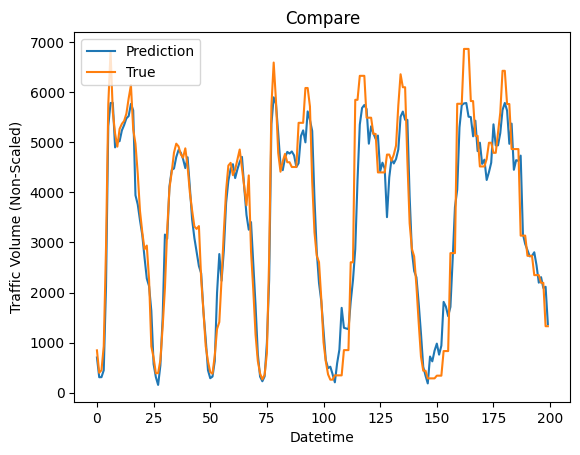

In [ ]:
  # Plot the training and validation accuracy
plt.plot(y_pred_future)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Non-Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 71).
trainY shape == (33736, 1).


In [ ]:
total_samples = trainX.shape[0]
split_index = int(total_samples * 0.9)

X_train = trainX[:split_index]
y_train = trainY[:split_index]
X_test = trainX[split_index:]
y_test = trainY[split_index:]

In [ ]:
len(X_train)

30362

In [ ]:
len(X_test)

3374

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 14, 64)         │        34,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,265 (184.63 KB)

 Trainable params: 47,265 (184.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - loss: 0.5058 - val_loss: 0.0908
Epoch 2/5
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.1415 - val_loss: 0.0816
Epoch 3/5
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.1216 - val_loss: 0.0693
Epoch 4/5
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 0.1206 - val_loss: 0.0638
Epoch 5/5
1708/1708 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 0.1132 - val_loss: 0.0553


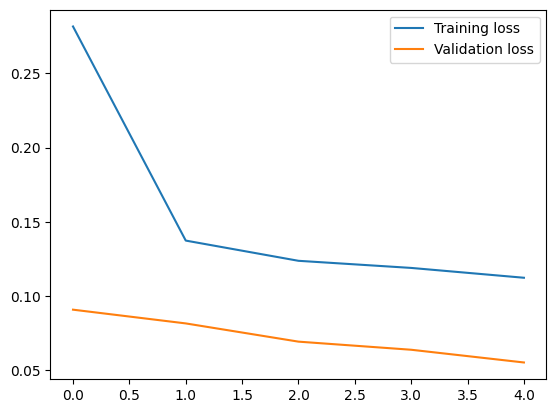

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
prediction = model.predict(X_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


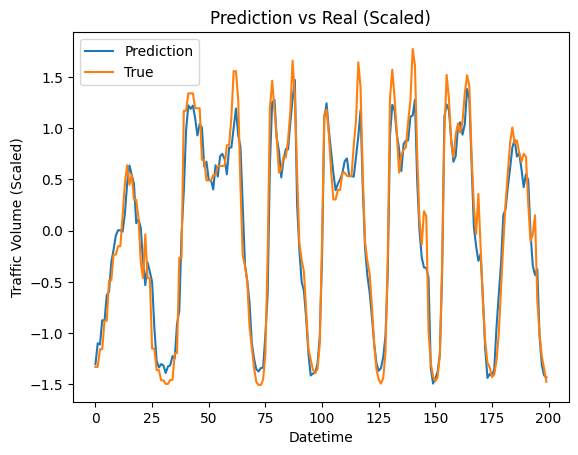

In [ ]:
# Plot the training and validation accuracy
plt.plot(prediction[:200])
plt.plot(y_test[:200])
plt.title('Prediction vs Real (Scaled)')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
prediction_copies = np.repeat(prediction, df_processed.shape[1], axis=-1)
pred_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

In [ ]:
pred_unscaled

array([1058.0938 ,  836.58716, 1284.8469 , ..., 2107.7065 , 2075.1455 ,
       1511.3517 ], dtype=float32)

In [ ]:
true_value = df['traffic_volume'][split_index+14:].values

In [ ]:
len(df['traffic_volume'])

33750

In [ ]:
len(trainY)

33736

In [ ]:
true_value

array([ 591,  591,  935, ..., 2194, 1328, 1328])

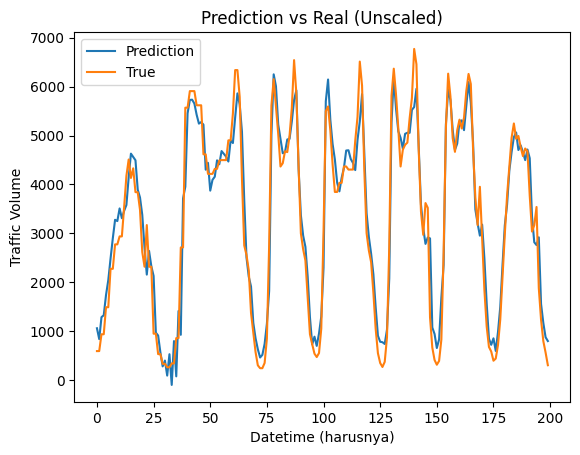

In [ ]:
# Plot Prediction vs Real Data
plt.plot(pred_unscaled[:200])
plt.plot(true_value[:200])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_holiday           43 non-null     object 
 1   air_pollution_index  33750 non-null  int64  
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  weather_description  33750 non-null  object 
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.

In [ ]:
df.tail()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2017-05-17 21:00:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
2017-05-17 22:00:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
2017-05-17 22:00:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
2017-05-17 23:00:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
2017-05-17 23:00:00,NaN,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


In [ ]:
df_test_raw = pd.read_csv('Test.csv')

In [ ]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            14454 non-null  object 
 1   is_holiday           18 non-null     object 
 2   air_pollution_index  14454 non-null  int64  
 3   humidity             14454 non-null  int64  
 4   wind_speed           14454 non-null  int64  
 5   wind_direction       14454 non-null  int64  
 6   visibility_in_miles  14454 non-null  int64  
 7   dew_point            14454 non-null  int64  
 8   temperature          14454 non-null  float64
 9   rain_p_h             14454 non-null  float64
 10  snow_p_h             14454 non-null  int64  
 11  clouds_all           14454 non-null  int64  
 12  weather_type         14454 non-null  object 
 13  weather_description  14454 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [ ]:
# Convert it to datetime format
df_test_raw['date_time'] = pd.to_datetime(df_test_raw['date_time'])

# Set 'date_time' as the index
df_test_raw.set_index('date_time', inplace=True)

<ipython-input-252-872a7606de4a>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_test_raw['date_time'] = pd.to_datetime(df_test_raw['date_time'])


In [ ]:
df_test_raw.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2017-05-18 00:00:00,NaN,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
2017-05-18 00:00:00,NaN,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2017-05-18 00:00:00,NaN,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
2017-05-18 01:00:00,NaN,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
2017-05-18 01:00:00,NaN,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [ ]:
df_is_holiday = pd.get_dummies(df_test_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_test_raw['weather_type'])
df_weather_description = pd.get_dummies(df_test_raw['weather_description'])

In [ ]:
df_test_processed = pd.concat([df_test_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [ ]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14454 entries, 2017-05-18 00:00:00 to 2018-09-30 23:00:00
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           18 non-null     object 
 1   air_pollution_index                  14454 non-null  int64  
 2   humidity                             14454 non-null  int64  
 3   wind_speed                           14454 non-null  int64  
 4   wind_direction                       14454 non-null  int64  
 5   visibility_in_miles                  14454 non-null  int64  
 6   dew_point                            14454 non-null  int64  
 7   temperature                          14454 non-null  float64
 8   rain_p_h                             14454 non-null  float64
 9   snow_p_h                             14454 non-null  int64  
 10  clouds_all                           14454 non-null  int64 

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  Christmas Day                        33750 non-null  bool  

In [ ]:
df_test_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [ ]:
train_columns = df_processed.columns
test_columns = df_test_processed.columns

In [ ]:
diff = []
for i, col in enumerate(train_columns):
  if col not in test_columns:
    diff.append([i, col])

In [ ]:
diff

[[30, 'Squall'],
 [32, 'SQUALLS'],
 [38, 'freezing rain'],
 [46, 'light rain and snow'],
 [58, 'shower snow'],
 [64, 'thunderstorm with drizzle'],
 [69, 'very heavy rain'],
 [70, 'traffic_volume']]

In [ ]:
length = df_test_processed.shape[0]
zero_array = np.zeros(length)
length

14454

In [ ]:
for col in diff:
  df_test_processed.insert(col[0], col[1], zero_array)

In [ ]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14454 entries, 2017-05-18 00:00:00 to 2018-09-30 23:00:00
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  14454 non-null  int64  
 1   humidity                             14454 non-null  int64  
 2   wind_speed                           14454 non-null  int64  
 3   wind_direction                       14454 non-null  int64  
 4   visibility_in_miles                  14454 non-null  int64  
 5   dew_point                            14454 non-null  int64  
 6   temperature                          14454 non-null  float64
 7   rain_p_h                             14454 non-null  float64
 8   snow_p_h                             14454 non-null  int64  
 9   clouds_all                           14454 non-null  int64  
 10  Christmas Day                        14454 non-null  bool  

In [ ]:
# Drop target column
# df_test_processed.drop(columns=['traffic_volume'], inplace=True)

In [ ]:
df_test_processed.shape

(14454, 71)

In [ ]:
df_test_processed_scaled = scaler.transform(df_test_processed)

In [ ]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 14  # Number of past data we want to use to predict the future.

In [ ]:
df_test_predict = df_processed_scaled[-n_past:]

In [ ]:
df_test_predict.shape

(14, 71)

In [ ]:
predicts = []

In [ ]:
df_test_processed_scaled.shape

(14454, 71)

In [ ]:
for i in range(len(df_test_processed_scaled)):
    print(i)
    input_data = df_test_predict[-n_past:]

    reshaped_input_data = input_data[np.newaxis, :]
    predict = model.predict(reshaped_input_data)

    predict_value = predict[0][0]
    predicts.append(predict_value)

    new_row = df_test_processed_scaled[i][:-1]
    new_row = np.append(new_row, predict_value)

    # Check for shape mismatch
    if new_row.shape[0] != df_test_predict.shape[1]:
        print(f"Shape mismatch: df_test_predict has {df_test_predict.shape[1]} columns, "
              f"but new_row has {new_row.shape[0]} columns")
        break  # Stop the loop to avoid further errors

    df_test_predict = np.vstack([df_test_predict, new_row])

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
9638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
9639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
9640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
9641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
9642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
9643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
9644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
9645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
9646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
9647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
9648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
9649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9650
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
9651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
9652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
9653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
9654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
9655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
9656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
9657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
9658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
9659
1/1

In [ ]:
len(predicts)

16159

In [ ]:
data_to_show = 200

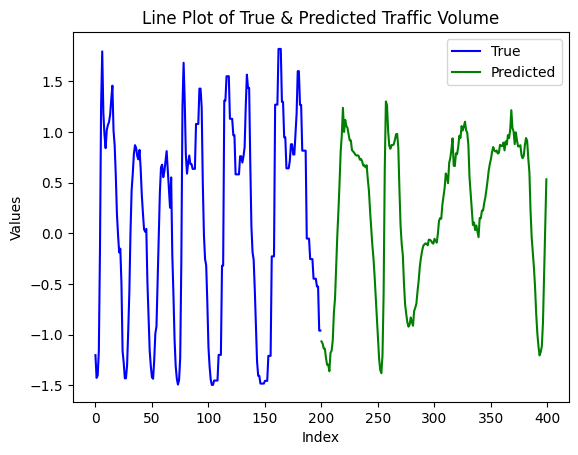

In [ ]:
true_traffics = trainY[-data_to_show:]
predict_traffic = predicts[:data_to_show]

# Plot true_traffics
plt.plot(true_traffics, label='True', color='blue')

x_vals = range(len(true_traffics), len(true_traffics) + len(predict_traffic))
plt.plot(x_vals, predict_traffic, label='Predicted', color='green')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of True & Predicted Traffic Volume')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(true_traffics, predict_traffic))
print("RMSE:", rmse)

RMSE: 1.134395105883129


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(true_traffics, predict_traffic)
r2 = r2_score(true_traffics, predict_traffic)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.89
